<a href="https://colab.research.google.com/github/nguyenduongtri5703/forest_fires_prediction/blob/main/DM_Project_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/dataset'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/dataset


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
with open('forestfires.names', 'r', encoding='latin1') as file:
    content = file.read()
    print(content)

Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007
   
3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, 
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)


In [ ]:
forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
forestfires.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


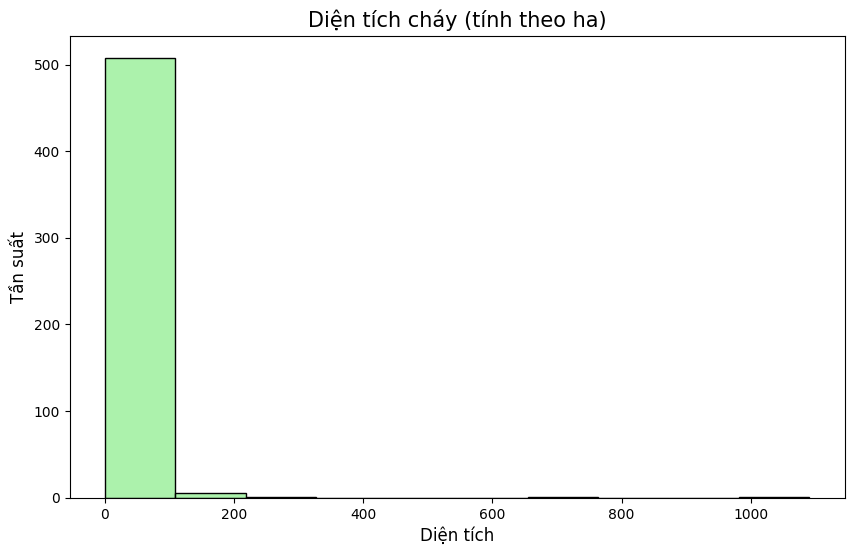

In [ ]:
# Tạo một biểu đồ histogram cho cột 'area'
plt.figure(figsize=(10, 6))
sns.histplot(forestfires['area'], bins=10, color='lightgreen')

# Thêm tiêu đề và nhãn cho trục
plt.title('Diện tích cháy (tính theo ha)', fontsize=15)
plt.xlabel('Diện tích', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

# Hiển thị biểu đồ
plt.show()

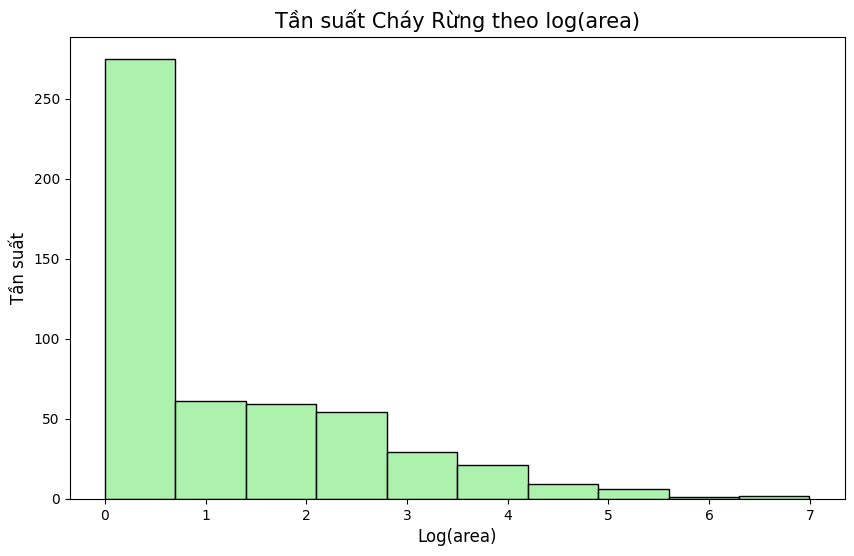

In [ ]:
# Biến đổi cột 'area' theo hàm logarit ln(x + 1)
forestfires['area'] = np.log(forestfires['area'] + 1)

# Tạo biểu đồ histogram cho cột 'log_area' sau khi biến đổi
plt.figure(figsize=(10, 6))
sns.histplot(forestfires['area'], bins = 10, color='lightgreen')

# Thêm tiêu đề và nhãn cho trục
plt.title('Tần suất Cháy Rừng theo log(area)', fontsize=15)
plt.xlabel('Log(area)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [ ]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


In [ ]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
labels = ["month", "day"]
for label in labels:
    le = LabelEncoder()
    forestfires[label] = le.fit_transform(forestfires[label])
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
scaler = StandardScaler()

X = forestfires.drop('area', axis=1)
y = forestfires['area']

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,-0.289524,-1.057862,1.199754,-0.383187,0.282028,-0.133975,0.821382,-0.136477,0.794833,-1.060516,-0.009834,-0.073268
173,-0.289524,-0.244001,1.199754,-0.903154,0.046297,0.244241,0.559101,-0.443828,-0.204993,-0.324396,-1.015466,-0.073268
272,-1.154748,0.569860,-1.089076,1.176715,0.263895,0.652153,0.444908,1.158784,0.225966,0.166351,-0.009834,-0.073268
497,-0.722136,-0.244001,-1.089076,1.176715,0.989220,1.097573,0.497365,1.158784,2.311811,-1.060516,-1.015466,-0.073268
182,0.143088,-0.244001,-0.631310,0.136781,-0.697161,-1.488991,-2.016091,-1.124389,-1.118628,0.534411,-1.015466,-0.073268


In [ ]:
# feature selection
STFWI = ["X", "Y", "month", "day", "FFMC", "DMC", "DC", "ISI"]
STM = ["X", "Y", "month", "day", "temp", "RH", "wind", "rain"]
FWI = ["FFMC", "DMC", "DC", "ISI"]
M = ["temp", "RH", "wind", "rain"]

# kernel
kernels = [2**-9, 2**-7, 2**-5, 2**-3, 2**-1]
table = PrettyTable()
table.field_names = ["Model", "STFWI", "STM", "FWI", "M"]

In [ ]:
# Khởi tạo danh sách chứa các kernel tốt nhất cho mỗi nhóm feature
best_kernels = []

# Lặp qua các nhóm features và tìm kernel tốt nhất cho mỗi nhóm
for feature_group in [STFWI, STM, FWI, M]:
    best_kernel = None
    best_r2_score = -float('inf')  # Đặt giá trị khởi tạo thấp nhất

    # Lặp qua các giá trị kernel
    for kernel in kernels:
        # Xây dựng mô hình SVM với kernel linear cho hồi quy
        svr_model = SVR(kernel='linear')

        # Chọn các feature từ DataFrame dựa trên feature_group bằng .loc
        X_train_group = X_train.loc[:, feature_group]
        X_test_group = X_test.loc[:, feature_group]

        # Huấn luyện mô hình
        svr_model.fit(X_train_group, y_train)

        # Dự đoán và tính R^2 score
        y_pred = svr_model.predict(X_test_group)
        r2 = r2_score(y_test, y_pred)

        # Cập nhật best_kernel nếu R^2 score cao hơn
        if r2 > best_r2_score:
            best_r2_score = r2
            best_kernel = kernel

    # Thêm kernel tốt nhất cho nhóm feature vào danh sách
    best_kernels.append(best_kernel)

# Thêm kết quả vào bảng
table.add_row(["SVR"] + best_kernels)

# In bảng kết quả
print(table)

+-------+-------------+-------------+-------------+-------------+
| Model |    STFWI    |     STM     |     FWI     |      M      |
+-------+-------------+-------------+-------------+-------------+
|  SVR  | 0.001953125 | 0.001953125 | 0.001953125 | 0.001953125 |
+-------+-------------+-------------+-------------+-------------+


In [ ]:
result = PrettyTable()
result.field_names = ["Model", "STFWI", "STM", "FWI", "M"]

# kernel
kernel = 2**-9

# Hàm huấn luyện mô hình và tính MAE, RMSE với đảo ngược `ln(x + 1)`
def train_and_evaluate_svr_inverse(X_train, X_test, y_train, y_test, feature_group, kernel):
    # Xây dựng mô hình SVM với kernel linear cho hồi quy
    svr_model = SVR(kernel='linear')

    # Chọn các feature từ DataFrame dựa trên feature_group
    X_train_group = X_train.loc[:, feature_group]
    X_test_group = X_test.loc[:, feature_group]

    # Huấn luyện mô hình
    svr_model.fit(X_train_group, y_train)

    # Dự đoán
    y_pred_ln = svr_model.predict(X_test_group)

    # Đảo ngược phép biến đổi `ln(x + 1)` để đưa về giá trị gốc
    y_pred = np.exp(y_pred_ln) - 1
    y_actual = np.exp(y_test) - 1

    # Tính MAE và RMSE với giá trị gốc
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Trả về MAE và RMSE
    return mae, rmse

# Lặp qua các nhóm features và huấn luyện mô hình
mae_rmse_values = []
for feature_group in [STFWI, STM, FWI, M]:
    # Huấn luyện lại mô hình và tính toán MAE, RMSE với đảo ngược biến đổi
    mae, rmse = train_and_evaluate_svr_inverse(X_train, X_test, y_train, y_test, feature_group, kernel)

    # Thêm kết quả MAE và RMSE vào danh sách
    mae_rmse_values.append(f"{mae:.4f} + ({rmse:.4f})")

# Thêm kết quả vào bảng
result.add_row(["SVM"] + mae_rmse_values)

# In bảng kết quả
print(result)

+-------+----------------------+----------------------+----------------------+----------------------+
| Model |        STFWI         |         STM          |         FWI          |          M           |
+-------+----------------------+----------------------+----------------------+----------------------+
|  SVM  | 19.7282 + (110.1454) | 19.6688 + (110.1503) | 19.6865 + (110.1853) | 19.6078 + (110.2303) |
+-------+----------------------+----------------------+----------------------+----------------------+


In [ ]:
# Hàm huấn luyện mô hình và tính MAE, RMSE với đảo ngược `ln(x + 1)`
def train_and_evaluate_model_inverse(model, X_train, X_test, y_train, y_test, feature_group):
    # Chọn các feature từ DataFrame dựa trên feature_group
    X_train_group = X_train.loc[:, feature_group]
    X_test_group = X_test.loc[:, feature_group]

    # Huấn luyện mô hình
    model.fit(X_train_group, y_train)

    # Dự đoán
    y_pred_ln = model.predict(X_test_group)

    # Đảo ngược phép biến đổi `ln(x + 1)` để đưa về giá trị gốc
    y_pred = np.exp(y_pred_ln) - 1
    y_actual = np.exp(y_test) - 1

    # Tính MAE và RMSE với giá trị gốc
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Trả về MAE và RMSE
    return mae, rmse

# Lặp qua các nhóm features và huấn luyện với Decision Tree và Random Forest
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=500, random_state=42),
}

# Thêm kết quả cho từng mô hình vào bảng
for model_name, model in models.items():
    mae_rmse_values = []
    for feature_group in [STFWI, STM, FWI, M]:
        # Huấn luyện và tính toán MAE, RMSE
        mae, rmse = train_and_evaluate_model_inverse(model, X_train, X_test, y_train, y_test, feature_group)

        # Thêm kết quả MAE và RMSE vào danh sách
        mae_rmse_values.append(f"{mae:.4f} + ({rmse:.4f})")

    # Thêm kết quả của mô hình vào bảng
    result.add_row([model_name] + mae_rmse_values)

# In bảng kết quả
print(result)

+---------------+----------------------+----------------------+----------------------+----------------------+
|     Model     |        STFWI         |         STM          |         FWI          |          M           |
+---------------+----------------------+----------------------+----------------------+----------------------+
|      SVM      | 19.7282 + (110.1454) | 19.6688 + (110.1503) | 19.6865 + (110.1853) | 19.6078 + (110.2303) |
| Decision Tree | 26.5027 + (113.8507) | 30.4462 + (115.9671) | 20.0663 + (108.6686) | 21.8256 + (110.5237) |
| Random Forest | 20.3988 + (109.3755) | 19.8882 + (110.0438) | 19.4475 + (108.5054) | 19.7940 + (110.0153) |
+---------------+----------------------+----------------------+----------------------+----------------------+


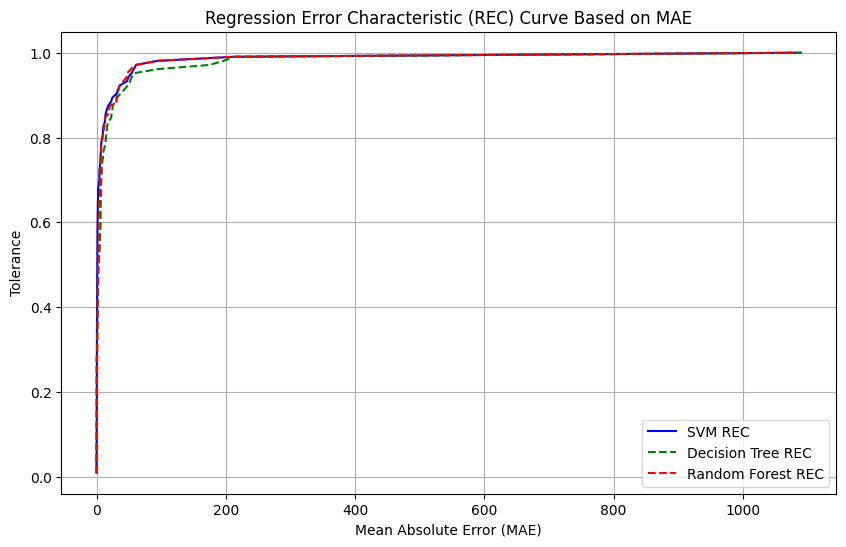

In [ ]:
# Hàm vẽ đường cong REC dựa trên MAE
def plot_rec_based_on_mae(models, model_names, X_test, y_test, feature_group):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red']
    linestyles = ['-', '--', '--']

    for i, (model, name) in enumerate(zip(models, model_names)):
        # Lấy feature group
        X_test_group = X_test.loc[:, feature_group]

        # Dự đoán với mô hình
        y_pred_ln = model.predict(X_test_group)

        # Đảo ngược `ln(x + 1)`
        y_pred = np.exp(y_pred_ln) - 1
        y_actual = np.exp(y_test) - 1

        # Tính lỗi tuyệt đối
        errors = np.abs(y_actual - y_pred)

        # Sắp xếp lỗi theo thứ tự tăng dần
        sorted_errors = np.sort(errors)

        # Tỷ lệ phần trăm các điểm dữ liệu có lỗi nhỏ hơn từng ngưỡng
        cumulative_percentage = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

        # Vẽ đường cong REC
        plt.plot(sorted_errors, cumulative_percentage, label=f"{name} REC",
                 color=colors[i], linestyle=linestyles[i])

    plt.title("Regression Error Characteristic (REC) Curve Based on MAE")
    plt.xlabel("Mean Absolute Error (MAE)")
    plt.ylabel("Tolerance")
    plt.legend()
    plt.grid()
    plt.show()

# Huấn luyện mô hình SVM, Decision Tree, và Random Forest trên nhóm feature STFWI
svm_model = SVR(kernel='linear')
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=500)

# Huấn luyện mô hình
svm_model.fit(X_train.loc[:, STFWI], y_train)
dt_model.fit(X_train.loc[:, STFWI], y_train)
rf_model.fit(X_train.loc[:, STFWI], y_train)

# Gọi các hàm vẽ
models = [svm_model, dt_model, rf_model]
model_names = ["SVM", "Decision Tree", "Random Forest"]

# Vẽ đường cong REC
plot_rec_based_on_mae(models, model_names, X_test, y_test, STFWI)